# Part 1: Bigram language model
2 char at a time. From char 1, predict char 2

In [1]:
words = open('names.txt', 'r').read().splitlines()

In [2]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [3]:
b = {}
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1 # b.get(bigram, 0) returns 0 if bigram not in b

In [4]:
sorted(b.items(), key=lambda kv: kv[1], reverse=True)[:10]

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963)]

In [5]:
import torch


In [68]:
N = torch.zeros((27, 27), dtype=torch.int32)

In [88]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()} 

In [70]:
for w in words:
    chs = ['<.>'] + list(w) + ['<.>']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

In [71]:
N[0]

tensor([11606,  1847,  2012,  2732,  2223,   551,   837,  3206,  2241,  2597,
         3531,  4100,  4172,  6584,   457,   597,   152,  4903,  3173,  1995,
          459,  1210,   468,   316,  2585,  1364,     0], dtype=torch.int32)

In [72]:
p = N[0].float()
p = p / p.sum()
p

tensor([0.1761, 0.0280, 0.0305, 0.0414, 0.0337, 0.0084, 0.0127, 0.0486, 0.0340,
        0.0394, 0.0536, 0.0622, 0.0633, 0.0999, 0.0069, 0.0091, 0.0023, 0.0744,
        0.0481, 0.0303, 0.0070, 0.0184, 0.0071, 0.0048, 0.0392, 0.0207, 0.0000])

In [73]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]

'k'

torch.multinomial returns a tensor of indices sampled from the multinomial probability distribution located in the corresponding row of tensor input.

torch generator object is a random number generator

In [78]:
g = torch.Generator().manual_seed(2147483647)

for i in range(5):

    ix = 0
    out = []
    while True:
        p = P[ix]
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out)) 

k<.>
xoene<.>
midrie<.>
r<.>
ry<.>


# Part 2: Neural network bigram

In [89]:
# create the training set of bigrams (x,y)
xs, ys = [], []

for w in words[:1]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    print(ch1, ch2)
    xs.append(ix1)
    ys.append(ix2)
    
xs = torch.tensor(xs)
ys = torch.tensor(ys)


. e
e m
m m
m a
a .


In [90]:
xs

tensor([ 0,  5, 13, 13,  1])

In [92]:
ys

tensor([ 5, 13, 13,  1,  0])

In [95]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=27).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [98]:
xenc.shape

torch.Size([5, 27])

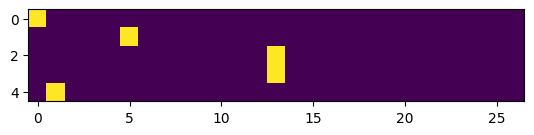

In [102]:
import matplotlib.pyplot as plt
#list of cmpa names: https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
plt.imshow(xenc, cmap='viridis')

In [104]:
W = torch.randn((27, 1))
xenc @ W # the @ operator is matrix multiplication in pytorch 
 

torch.Size([5, 1])